In [2]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


[INFO] Using train data: /content/drive/MyDrive/Study/data/aug_train.csv
[INFO] Detected target column: target
[INFO] Shapes | BASE: (19158, 14) | ENH: (19158, 18)

[BASELINE (원본)] START

[BASELINE (원본)] === Validation Report ===
              precision    recall  f1-score   support

           0     0.8227    0.8870    0.8537      2877
           1     0.5548    0.4241    0.4807       955

    accuracy                         0.7717      3832
   macro avg     0.6887    0.6556    0.6672      3832
weighted avg     0.7559    0.7717    0.7607      3832

[BASELINE (원본)] ROC-AUC: 0.7817
[BASELINE (원본)] CV ROC-AUC (5-fold) mean ± std = 0.7595 ± 0.0037

[BASELINE (원본)] === Top-15 Model-based Feature Importance ===


,feature,importance
1,training_hours,0.209350
2,experience_num,0.132336
0,city_development_index,0.114044
68,city_city_21,0.045460
150,company_size_50-99,0.033505
160,last_new_job_1,0.018424
135,education_level_Graduate,0.015153
4,stem_flag,0.014496
161,last_new_job_2,0.014122
10,city_city_103,0.013624


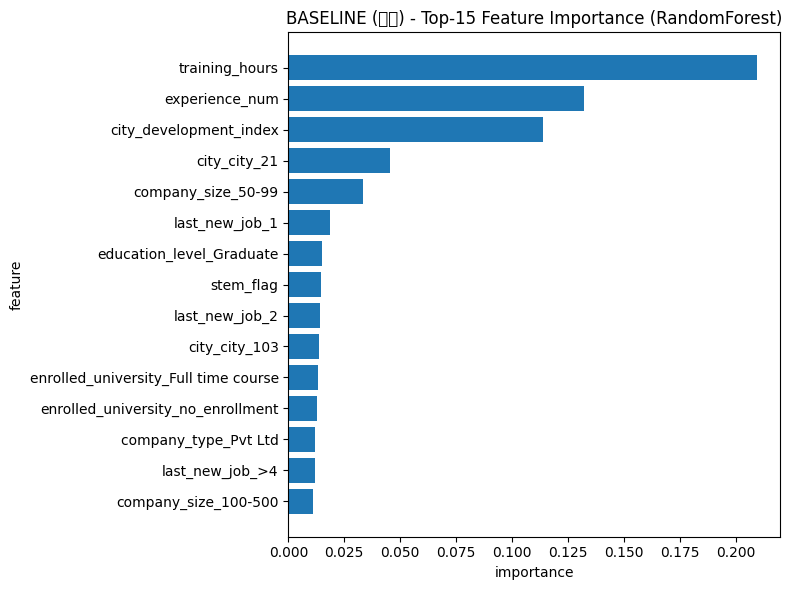


[BASELINE (원본)] === Top-15 Permutation Importance (ΔROC-AUC) ===


,feature,pi_mean,pi_std
0,city_development_index,0.051135,0.003462
150,company_size_50-99,0.030104,0.004448
68,city_city_21,0.019128,0.002432
2,experience_num,0.010271,0.003589
4,stem_flag,0.004111,0.001779
52,city_city_16,0.003002,0.000646
155,company_type_Funded Startup,0.002247,0.000570
165,last_new_job_never,0.001625,0.000873
148,company_size_1000-4999,0.001238,0.000606
11,city_city_104,0.000841,0.000312


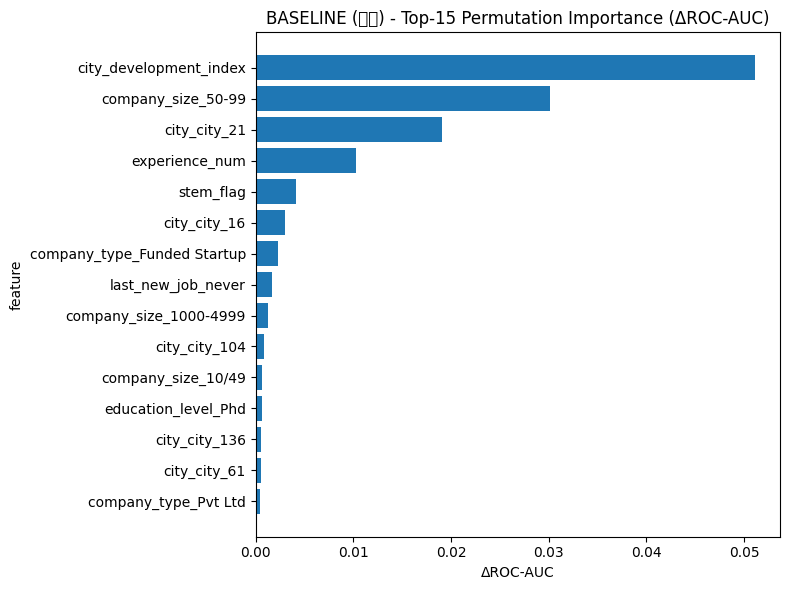


[ENHANCED (조합 피처 추가)] START

[ENHANCED (조합 피처 추가)] === Validation Report ===
              precision    recall  f1-score   support

           0     0.8228    0.8863    0.8534      2877
           1     0.5539    0.4251    0.4810       955

    accuracy                         0.7714      3832
   macro avg     0.6884    0.6557    0.6672      3832
weighted avg     0.7558    0.7714    0.7606      3832

[ENHANCED (조합 피처 추가)] ROC-AUC: 0.7775
[ENHANCED (조합 피처 추가)] CV ROC-AUC (5-fold) mean ± std = 0.7577 ± 0.0048

[ENHANCED (조합 피처 추가)] === Top-15 Model-based Feature Importance ===


,feature,importance
1,training_hours,0.186016
0,city_development_index,0.115844
2,experience_num,0.069439
5,rel_exp_score,0.045966
70,city_city_21,0.042399
152,company_size_50-99,0.034938
162,last_new_job_1,0.020037
137,education_level_Graduate,0.014771
163,last_new_job_2,0.014741
12,city_city_103,0.014416


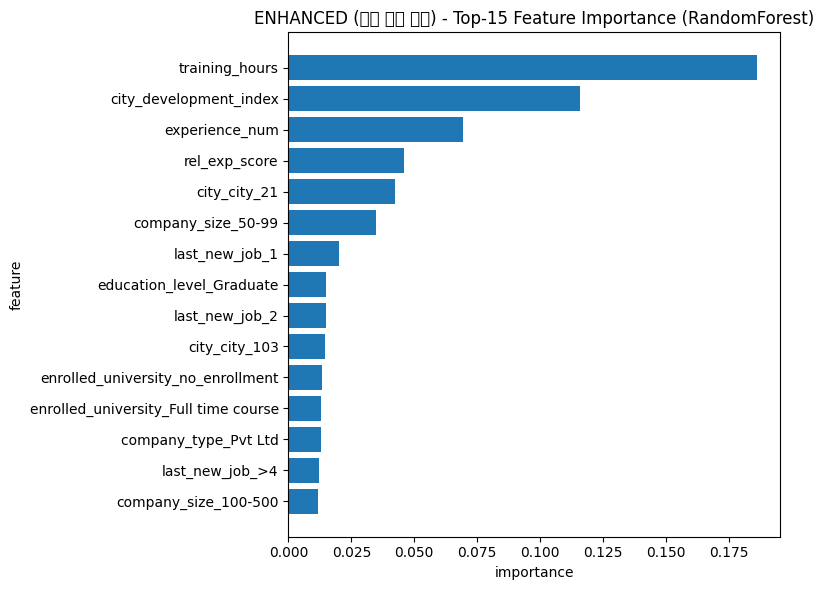


[ENHANCED (조합 피처 추가)] === Top-15 Permutation Importance (ΔROC-AUC) ===


,feature,pi_mean,pi_std
0,city_development_index,0.057140,0.003077
152,company_size_50-99,0.032630,0.004494
70,city_city_21,0.017642,0.002360
54,city_city_16,0.003215,0.000698
177,major_relexp_grp_UNK,0.002308,0.000844
167,last_new_job_never,0.002127,0.000747
157,company_type_Funded Startup,0.001469,0.000798
150,company_size_1000-4999,0.001303,0.000411
37,city_city_136,0.001020,0.000697
164,last_new_job_3,0.000631,0.000358


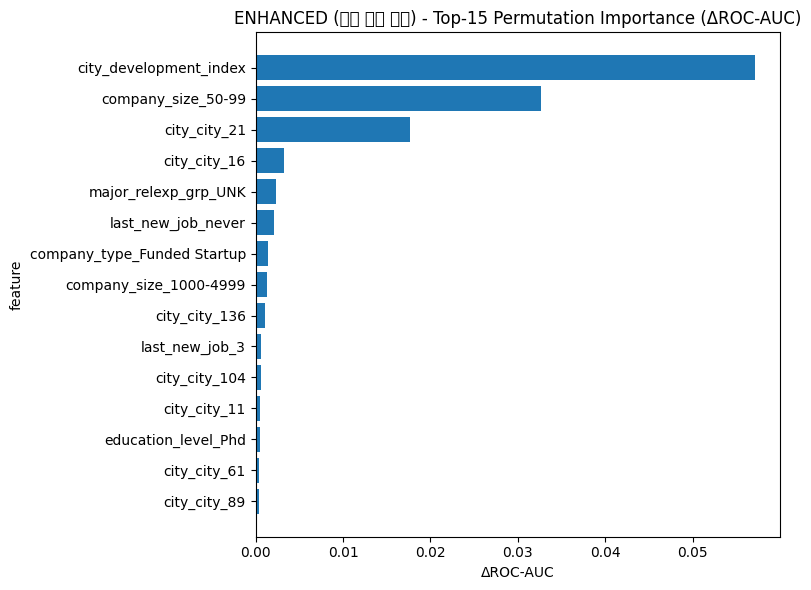


[SUMMARY] 성능 비교 (ROC-AUC, 5-fold CV 평균)
- BASELINE : 0.7595 ± 0.0037
- ENHANCED : 0.7577 ± 0.0048
→ ΔROC-AUC (ENH - BASE) = -0.0019


In [4]:
# ============================================================
# 실험 목적
# - HR Job Change 데이터(aug_train 기준)에서
#   relevent_experience / major_discipline / experience 를 조합한 파생 피처를 만들고
#   모델 성능(ROC-AUC/F1)이 베이스라인보다 개선되는지 확인한다.
#
# 실행 방법
# - 이 셀 하나만 실행하면 됨.
# - ori_train이 이미 메모리에 있거나, ./data/aug_train.csv 등이 있으면 자동 로딩.
# ============================================================

# -----------------------------
# 0) 라이브러리 & 유틸
# -----------------------------
import os, warnings
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from typing import List, Tuple
from sklearn.model_selection import train_test_split, StratifiedKFold, cross_val_score
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder
from sklearn.impute import SimpleImputer
from sklearn.pipeline import Pipeline
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, roc_auc_score
from sklearn.inspection import permutation_importance

warnings.filterwarnings("ignore")
try:
    from IPython.display import display
except:
    display = print

# -----------------------------
# 1) 데이터 준비 (ori_train 사용 또는 CSV 자동 탐지)
# -----------------------------
def load_train_df() -> pd.DataFrame:
    # 1) 이미 노트북에 ori_train이 있다면 그대로 사용
    if "ori_train" in globals():
        return globals()["ori_train"].copy()

    # 2) 파일 자동 탐지
    candidates = [
        "./data/aug_train.csv",
        "./aug_train.csv",
        "/content/drive/MyDrive/Study/data/aug_train.csv",
    ]
    for p in candidates:
        if os.path.exists(p):
            print(f"[INFO] Using train data: {p}")
            return pd.read_csv(p)
    raise FileNotFoundError("학습용 CSV를 찾을 수 없습니다. ori_train을 메모리에 두거나 ./data/aug_train.csv 를 확인하세요.")

df_raw = load_train_df()

# -----------------------------
# 2) 타깃 컬럼 자동 탐지
# -----------------------------
def detect_target(df: pd.DataFrame) -> str:
    for c in ["target", "job_change", "label"]:
        if c in df.columns:
            return c
    # 히유리스틱: {0,1} 이진 컬럼이 하나 뿐이면 타깃으로 가정
    bin_like = []
    for c in df.columns:
        vals = set(pd.Series(df[c]).dropna().unique().tolist())
        if len(vals) <= 3 and vals.issubset({0,1,'0','1'}):
            bin_like.append(c)
    if len(bin_like) == 1:
        return bin_like[0]
    raise ValueError("타깃 컬럼을 찾지 못했습니다. 'target' 또는 'job_change' 명칭을 확인하세요.")

TARGET = detect_target(df_raw)
print(f"[INFO] Detected target column: {TARGET}")

# -----------------------------
# 3) 식별자 제거 및 핵심 컬럼 정리
# -----------------------------
def drop_id_columns(df: pd.DataFrame) -> pd.DataFrame:
    id_cols = [c for c in df.columns if "id" in c.lower()]
    return df.drop(columns=id_cols, errors="ignore")

df = drop_id_columns(df_raw)

# -----------------------------
# 4) experience 수치화 & 관심 변수 전처리
#    - experience: "<1"→0, "1"~"20"→int, ">20"→21 (또는 20으로 묶어도 됨)
#    - relevent_experience: Has relevent experience → 1, else 0
#    - major_discipline: STEM 여부 → 1/0 (원본은 카테고리로도 유지함)
# -----------------------------
def to_experience_num(x):
    if pd.isna(x): return np.nan
    s = str(x).strip()
    if s == "<1": return 0
    if s.startswith(">"):
        try: return float(s[1:]) + 1  # >20 -> 21
        except: return 21
    try: return float(s)
    except: return np.nan

df["experience_num"] = df["experience"].apply(to_experience_num) if "experience" in df.columns else np.nan
df["rel_exp_flag"]   = (df["relevent_experience"] == "Has relevent experience").astype(int) if "relevent_experience" in df.columns else 0
df["stem_flag"]      = (df["major_discipline"] == "STEM").astype(int) if "major_discipline" in df.columns else 0

# -----------------------------
# 5) 파생 피처 생성 (실험 포인트)
# -----------------------------
df["rel_exp_score"] = df["experience_num"].fillna(0) * df["rel_exp_flag"]   # 경력×관련경험
df["stem_related"]  = df["stem_flag"] * df["rel_exp_flag"]                  # STEM×관련경험

# 경험 구간화 (0–2, 3–5, 6–9, 10–14, 15+)
exp_bins   = [-1, 2, 5, 9, 14, 100]
exp_labels = ["exp_0_2", "exp_3_5", "exp_6_9", "exp_10_14", "exp_15p"]
if "experience_num" in df.columns:
    df["exp_bin"] = pd.cut(df["experience_num"], bins=exp_bins, labels=exp_labels)

# 전공×관련경험 조합 카테고리
def major_relexp_group(row):
    m = row.get("major_discipline", np.nan)
    r = row.get("relevent_experience", np.nan)
    if pd.isna(m) or pd.isna(r): return "UNK"
    m2 = "STEM" if m=="STEM" else "NonSTEM"
    r2 = "Rel" if r=="Has relevent experience" else "NoRel"
    return f"{m2}_{r2}"
df["major_relexp_grp"] = df.apply(major_relexp_group, axis=1)

# -----------------------------
# 6) 베이스라인 vs 파생피처추가 데이터셋 구성
# -----------------------------
DROP_HIGH_CARDINALITY_CITY = False  # True로 바꾸면 city 제외(원핫 차원 폭증 방지)

def make_feature_tables(df: pd.DataFrame, target_col: str):
    # y는 가급적 int로 캐스팅(가능 시)
    y = df[target_col]
    try: y = y.astype(int)
    except: pass

    # 베이스라인: 원본에서 id/target 제외 + experience는 숫자형으로 대체
    base_cols = [c for c in df.columns if c not in [target_col, "experience", "exp_bin", "major_relexp_grp",
                                                    "rel_exp_score", "stem_related"]]
    X_base = df[base_cols].copy()
    if "experience_num" in df.columns:
        X_base["experience_num"] = df["experience_num"]

    if DROP_HIGH_CARDINALITY_CITY and "city" in X_base.columns:
        X_base = X_base.drop(columns=["city"])

    # 확장: 조합 피처 추가
    X_enh = X_base.copy()
    for c in ["rel_exp_score", "stem_related", "exp_bin", "major_relexp_grp"]:
        if c in df.columns:
            X_enh[c] = df[c]

    return X_base, y, X_enh, y

X_base, y, X_enh, _ = make_feature_tables(df, TARGET)
print("[INFO] Shapes | BASE:", X_base.shape, "| ENH:", X_enh.shape)

# -----------------------------
# 7) 전처리+모델 파이프라인
# -----------------------------
def build_pipeline(X: pd.DataFrame):
    num_cols = X.select_dtypes(include=[np.number]).columns.tolist()
    cat_cols = X.select_dtypes(include=["object","category","bool"]).columns.tolist()

    num_tf = Pipeline([("imputer", SimpleImputer(strategy="median"))])
    try:
        ohe = OneHotEncoder(handle_unknown="ignore", sparse_output=False)  # sklearn>=1.2
    except TypeError:
        ohe = OneHotEncoder(handle_unknown="ignore", sparse=False)        # sklearn<1.2
    cat_tf = Pipeline([("imputer", SimpleImputer(strategy="most_frequent")), ("onehot", ohe)])

    preprocess = ColumnTransformer(
        transformers=[("num", num_tf, num_cols), ("cat", cat_tf, cat_cols)],
        remainder="drop", sparse_threshold=0
    )
    rf = RandomForestClassifier(n_estimators=400, random_state=42, n_jobs=-1, class_weight="balanced_subsample")
    pipe = Pipeline([("preprocess", preprocess), ("rf", rf)])
    return pipe, num_cols, cat_cols

# -----------------------------
# 8) 학습/검증 + 성능 + 중요도 (n_jobs=1로 수정됨)
# -----------------------------
def evaluate_model(X: pd.DataFrame, y: pd.Series, title: str = "MODEL"):
    print("\n" + "="*70); print(f"[{title}] START")
    pipe, num_cols, cat_cols = build_pipeline(X)

    # Holdout split
    X_tr, X_va, y_tr, y_va = train_test_split(X, y, test_size=0.2, stratify=y, random_state=42)
    pipe.fit(X_tr, y_tr)

    # Holdout 성능
    pred = pipe.predict(X_va)
    proba = pipe.predict_proba(X_va)[:,1]
    print(f"\n[{title}] === Validation Report ===")
    print(classification_report(y_va, pred, digits=4))
    print(f"[{title}] ROC-AUC:", round(roc_auc_score(y_va, proba), 4))

    # 5-fold CV ROC-AUC
    skf = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)
    cv = cross_val_score(pipe, X, y, cv=skf, scoring="roc_auc", n_jobs=-1)
    print(f"[{title}] CV ROC-AUC (5-fold) mean ± std = {cv.mean():.4f} ± {cv.std():.4f}")

    # 모델 기반 중요도 (원핫 후 피처명 복원)
    ohe_names = np.array([])
    if len(cat_cols) > 0:
        fitted_ohe = pipe.named_steps["preprocess"].named_transformers_["cat"].named_steps["onehot"]
        ohe_names = fitted_ohe.get_feature_names_out(cat_cols)
    feature_names = np.concatenate([np.array(num_cols), ohe_names])

    importances = pipe.named_steps["rf"].feature_importances_
    fi = pd.DataFrame({"feature": feature_names, "importance": importances}).sort_values("importance", ascending=False)
    print(f"\n[{title}] === Top-15 Model-based Feature Importance ==="); display(fi.head(15))
    plt.figure(figsize=(8,6)); top = fi.head(15).iloc[::-1]
    plt.barh(top["feature"], top["importance"]); plt.title(f"{title} - Top-15 Feature Importance (RandomForest)")
    plt.xlabel("importance"); plt.ylabel("feature"); plt.tight_layout(); plt.show()

    # 퍼뮤테이션 중요도: 전처리된 X_va + 최종 모델로 계산 (★ n_jobs=1 로 수정)
    rf_final = pipe.named_steps["rf"]
    Xv_trans = pipe.named_steps["preprocess"].transform(X_va)
    perm = permutation_importance(rf_final, Xv_trans, y_va,
                                  n_repeats=10, random_state=42, n_jobs=1, scoring="roc_auc")
    pi = pd.DataFrame({"feature": feature_names,
                       "pi_mean": perm.importances_mean,
                       "pi_std": perm.importances_std}).sort_values("pi_mean", ascending=False)
    print(f"\n[{title}] === Top-15 Permutation Importance (ΔROC-AUC) ==="); display(pi.head(15))
    plt.figure(figsize=(8,6)); top_pi = pi.head(15).iloc[::-1]
    plt.barh(top_pi["feature"], top_pi["pi_mean"]); plt.title(f"{title} - Top-15 Permutation Importance (ΔROC-AUC)")
    plt.xlabel("ΔROC-AUC"); plt.ylabel("feature"); plt.tight_layout(); plt.show()

    return {"pipe": pipe, "feature_names": feature_names, "fi": fi, "pi": pi, "cv_scores": cv}

# -----------------------------
# 9) 베이스라인 vs 파생피처 추가 모델 비교 실행
# -----------------------------
res_base = evaluate_model(X_base, y, title="BASELINE (원본)")
res_enh  = evaluate_model(X_enh,  y, title="ENHANCED (조합 피처 추가)")

# -----------------------------
# 10) 결론 요약 출력
# -----------------------------
print("\n" + "="*70)
print("[SUMMARY] 성능 비교 (ROC-AUC, 5-fold CV 평균)")
print(f"- BASELINE : {res_base['cv_scores'].mean():.4f} ± {res_base['cv_scores'].std():.4f}")
print(f"- ENHANCED : {res_enh['cv_scores'].mean():.4f} ± {res_enh['cv_scores'].std():.4f}")
print(f"→ ΔROC-AUC (ENH - BASE) = {res_enh['cv_scores'].mean() - res_base['cv_scores'].mean():+.4f}")


In [ ]:
# ============================================================
# SHAP 해석 (전역/개별 영향)
# - 목표: ENHANCED(조합 피처 추가 모델)의 예측에서
#         어떤 피처가 어떻게 영향을 주는지 직관적으로 해석
# - 출력:
#   1) SHAP Summary Plot (전역 중요도 + 값-영향 분포)
#   2) 상위 3개 피처에 대한 Dependence Plot (값-영향 관계)
#   3) mean(|SHAP|) 랭킹 테이블
# ============================================================

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# 1) shap 설치/임포트 (설치가 안 되어 있으면 pip로 설치)
try:
    import shap
except Exception as e:
    print("[INFO] shap가 설치되어 있지 않네요. 다음 명령으로 설치 후 다시 실행하세요:")
    print("!pip install shap")
    raise

# 2) ENHANCED 셋과 동일 세팅으로 파이프라인 확보
#    - 이전 셀에서 res_enh(평가결과 사전) 또는 pipe(파이프라인)가 있으면 재사용
#    - 없다면 X_enh, y 기반으로 동일하게 학습
need_fit = False
if 'res_enh' in globals() and isinstance(res_enh, dict) and 'pipe' in res_enh:
    pipe_shap = res_enh['pipe']
else:
    try:
        pipe_shap
    except NameError:
        need_fit = True

# X_enh, y가 없다면 조합 피처 생성 세션을 먼저 실행해야 함
assert 'X_enh' in globals() and 'y' in globals(), "먼저 조합 피처를 만드는 셀을 실행해 X_enh, y를 준비해주세요."

# 3) 학습/검증 분할(동일한 기준) + 필요 시 파이프라인 학습
from sklearn.model_selection import train_test_split
X_tr_s, X_va_s, y_tr_s, y_va_s = train_test_split(
    X_enh, y, test_size=0.2, stratify=y, random_state=42
)

if need_fit:
    # 전처리+모델 파이프라인을 동일하게 구성
    from sklearn.compose import ColumnTransformer
    from sklearn.preprocessing import OneHotEncoder
    from sklearn.impute import SimpleImputer
    from sklearn.pipeline import Pipeline
    from sklearn.ensemble import RandomForestClassifier

    num_cols_s = X_enh.select_dtypes(include=[np.number]).columns.tolist()
    cat_cols_s = X_enh.select_dtypes(include=["object","category","bool"]).columns.tolist()

    num_tf_s = Pipeline([("imputer", SimpleImputer(strategy="median"))])
    try:
        ohe_s = OneHotEncoder(handle_unknown="ignore", sparse_output=False)
    except TypeError:
        ohe_s = OneHotEncoder(handle_unknown="ignore", sparse=False)

    cat_tf_s = Pipeline([
        ("imputer", SimpleImputer(strategy="most_frequent")),
        ("onehot", ohe_s),
    ])

    preprocess_s = ColumnTransformer(
        transformers=[
            ("num", num_tf_s, num_cols_s),
            ("cat", cat_tf_s, cat_cols_s),
        ],
        remainder="drop",
        sparse_threshold=0
    )

    rf_s = RandomForestClassifier(
        n_estimators=400, random_state=42, n_jobs=-1, class_weight="balanced_subsample"
    )
    pipe_shap = Pipeline([("preprocess", preprocess_s), ("rf", rf_s)])
    pipe_shap.fit(X_tr_s, y_tr_s)

# 4) 전처리 후 검증 행렬 + 최종 모델 준비
rf_final = pipe_shap.named_steps["rf"]
Xv_trans = pipe_shap.named_steps["preprocess"].transform(X_va_s)

# 5) 전처리 후 피처명 복원 (원핫 포함)
#    - 이전 셀 변수(cat_cols/num_cols)가 있다면 재사용하고, 아니면 여기서 재추출
try:
    cat_cols = X_enh.select_dtypes(include=["object","category","bool"]).columns.tolist()
    num_cols = X_enh.select_dtypes(include=[np.number]).columns.tolist()
except Exception:
    # 매우 예외적인 경우에 대비
    cat_cols, num_cols = [], []

ohe_names = np.array([])
try:
    fitted_ohe = pipe_shap.named_steps["preprocess"].named_transformers_["cat"].named_steps["onehot"]
    ohe_names = fitted_ohe.get_feature_names_out(cat_cols)
except Exception:
    pass

feature_names_trans = np.concatenate([np.array(num_cols), ohe_names])

# 6) SHAP 값 계산 (TreeExplainer가 트리계열에 최적)
explainer = shap.TreeExplainer(rf_final)
shap_values = explainer.shap_values(Xv_trans)

# 2-클래스 분류: shap_values가 [class0, class1] 리스트로 나오는 경우 class1 기준 사용
if isinstance(shap_values, list) and len(shap_values) == 2:
    sv_use = shap_values[1]
else:
    sv_use = shap_values

# 7) 전역 중요도: mean(|SHAP|) 랭킹 테이블
mean_abs = np.abs(sv_use).mean(axis=0)
shap_rank = pd.DataFrame({
    "feature": feature_names_trans,
    "mean_abs_shap": mean_abs
}).sort_values("mean_abs_shap", ascending=False)

print("\n=== Top-20 by mean(|SHAP|) ===")
display(shap_rank.head(20))

# 8) Summary Plot (전역 중요도 + 값-영향 분포)
#    - 색상: SHAP 기본 팔레트 (값 크기/방향 직관적으로 보려고 그대로 사용)
#    - show=False 후 저장까지 하고 표시
shap.summary_plot(sv_use, Xv_trans, feature_names=feature_names_trans, show=False)
plt.tight_layout()
plt.show()

# 9) Dependence Plot (상위 3개 피처)
top_features = shap_rank["feature"].head(3).tolist()
for f in top_features:
    try:
        shap.dependence_plot(f, sv_use, Xv_trans, feature_names=feature_names_trans, show=False)
        plt.tight_layout()
        plt.show()
    except Exception as e:
        print(f"[WARN] Dependence plot 실패: {f} ({e})")

# 10) 간단 해석 가이드 출력
print("\n[해석 가이드]")
print("- Summary Plot: 좌우는 영향 방향(+/-), 색은 해당 피처 값의 높고 낮음을 의미합니다.")
print("- mean(|SHAP|): 평균 절대 영향 크기 → 전역적으로 중요한 피처 순위.")
print("- Dependence Plot: 특정 피처 값이 커지거나(또는 특정 범주일 때) 예측에 어떤 방향으로 얼마나 영향을 주는지 표시합니다.")
print("- 상위권에 꾸준히 등장하는 피처(예: experience_num, rel_exp_score, stem_related, major_relexp_grp 등)가 실제로 조합 피처의 유효성을 뒷받침합니다.")


In [ ]:
# ===============================
# 파생/경력 관련 피처 중요도만 추출
# ===============================
interest_feats = [
    "experience_num",
    "relevent_experience",
    "major_discipline",
    "rel_exp_flag",
    "stem_flag",
    "rel_exp_score",
    "stem_related",
    "exp_bin",
    "major_relexp_grp",
    "training_hours"
]

# 모델 기반 Feature Importance
fi_interest = res_enh["fi"][res_enh["fi"]["feature"].str.contains("|".join(interest_feats))]
print("=== Model-based Feature Importance (조합/경력 관련만) ===")
display(fi_interest.sort_values("importance", ascending=False))

# Permutation Importance
pi_interest = res_enh["pi"][res_enh["pi"]["feature"].str.contains("|".join(interest_feats))]
print("=== Permutation Importance (조합/경력 관련만) ===")
display(pi_interest.sort_values("pi_mean", ascending=False))


In [3]:
# ============================================================
# 전처리 + 파생 피처 생성 + 테이블 요약 (모델 X)
# - 대상: HR Job Change (aug_train) 또는 메모리의 ori_train
# - 출력:
#   1) 새로 만든 파생 피처 목록
#   2) 결측/유니크 요약표
#   3) 숫자 요약(describe)와 상관(신규 수치 피처 vs target)
#   4) 범주 피처 분포표 (rel/major/exp_bin/major_relexp_grp)
# ============================================================

import os
import numpy as np
import pandas as pd

# -----------------------------
# 1) 데이터 로딩 (ori_train 우선, 없으면 CSV 자동 탐지)
# -----------------------------
def load_train_df() -> pd.DataFrame:
    if "ori_train" in globals():
        return globals()["ori_train"].copy()
    for p in ["./data/aug_train.csv", "./aug_train.csv", "/content/drive/MyDrive/Study/data/aug_train.csv"]:
        if os.path.exists(p):
            print(f"[INFO] Using train data: {p}")
            return pd.read_csv(p)
    raise FileNotFoundError("ori_train이 없고 CSV도 못 찾았습니다. ./data/aug_train.csv 확인!")

df = load_train_df()

# -----------------------------
# 2) 타깃 자동 탐지
# -----------------------------
def detect_target(df: pd.DataFrame) -> str:
    for c in ["target", "job_change", "label"]:
        if c in df.columns:
            return c
    # (옵션) 이진 컬럼이 유일하면 타깃으로 간주
    bin_like = []
    for c in df.columns:
        vals = set(pd.Series(df[c]).dropna().unique().tolist())
        if len(vals) <= 3 and vals.issubset({0,1,"0","1"}):
            bin_like.append(c)
    if len(bin_like) == 1:
        return bin_like[0]
    raise ValueError("타깃 컬럼을 찾지 못했습니다. 'target' 또는 'job_change' 확인!")

TARGET = detect_target(df)
df[TARGET] = df[TARGET].astype(int)  # 가능하면 int로 고정
print(f"[INFO] Detected target column: {TARGET}")

# -----------------------------
# 3) 식별자 제거
# -----------------------------
id_cols = [c for c in df.columns if "id" in c.lower()]
if id_cols:
    df = df.drop(columns=id_cols)

# -----------------------------
# 4) 전처리 & 파생 피처 생성
#    - experience_num: "<1"→0, "1~20"→int, ">20"→21
#    - rel_exp_flag: Has relevent experience → 1, else 0
#    - stem_flag: major_discipline == STEM → 1, else 0
#    - exp_bin: experience_num 구간(0–2, 3–5, 6–9, 10–14, 15+)
#    - major_relexp_grp: (STEM/NonSTEM) × (Rel/NoRel/UNK)
#    - rel_exp_score, stem_related
#    - training_* 조합: per_year, rel, no_rel, stem, nonstem, × exp_bin 더미
# -----------------------------
def to_experience_num(x):
    if pd.isna(x): return np.nan
    s = str(x).strip()
    if s == "<1": return 0
    if s.startswith(">"):
        try: return float(s[1:]) + 1  # >20 -> 21
        except: return 21
    try: return float(s)
    except: return np.nan

# 기반 피처
if "experience" in df.columns and "experience_num" not in df.columns:
    df["experience_num"] = df["experience"].apply(to_experience_num)
if "relevent_experience" in df.columns and "rel_exp_flag" not in df.columns:
    df["rel_exp_flag"] = (df["relevent_experience"] == "Has relevent experience").astype(int)
if "major_discipline" in df.columns and "stem_flag" not in df.columns:
    df["stem_flag"] = (df["major_discipline"] == "STEM").astype(int)

# 구간화
exp_bins   = [-1, 2, 5, 9, 14, 100]
exp_labels = ["exp_0_2","exp_3_5","exp_6_9","exp_10_14","exp_15p"]
if "experience_num" in df.columns:
    df["exp_bin"] = pd.cut(df["experience_num"], bins=exp_bins, labels=exp_labels)

# 전공×관련경험 그룹
def major_relexp_group(row):
    m = row.get("major_discipline", np.nan)
    r = row.get("relevent_experience", np.nan)
    if pd.isna(m) or pd.isna(r): return "UNK"
    m2 = "STEM" if m == "STEM" else "NonSTEM"
    r2 = "Rel" if r == "Has relevent experience" else "NoRel"
    return f"{m2}_{r2}"
df["major_relexp_grp"] = df.apply(major_relexp_group, axis=1)

# 핵심 조합
df["rel_exp_score"] = df.get("experience_num", pd.Series(index=df.index)).fillna(0) * df.get("rel_exp_flag", 0)
df["stem_related"]  = df.get("stem_flag", 0) * df.get("rel_exp_flag", 0)

# training_hours 조합 (있을 때만)
new_training_cols = []
if "training_hours" in df.columns:
    # (a) 경력 대비 교육시간
    df["training_per_year"] = df["training_hours"] / (df.get("experience_num", 0).fillna(0).clip(lower=0) + 1)
    new_training_cols.append("training_per_year")
    # (b) 관련경험 결합
    if "rel_exp_flag" in df.columns:
        df["training_rel"]    = df["training_hours"] * df["rel_exp_flag"]
        df["training_no_rel"] = df["training_hours"] * (1 - df["rel_exp_flag"])
        new_training_cols += ["training_rel", "training_no_rel"]
    # (c) 전공 결합
    if "stem_flag" in df.columns:
        df["training_stem"]    = df["training_hours"] * df["stem_flag"]
        df["training_nonstem"] = df["training_hours"] * (1 - df["stem_flag"])
        new_training_cols += ["training_stem", "training_nonstem"]
    # (d) exp_bin 더미와 곱
    if "exp_bin" in df.columns:
        exp_dum = pd.get_dummies(df["exp_bin"], prefix="exp_bin")
        for col in exp_dum.columns:
            new_col = f"training_{col}"  # e.g., training_exp_bin_exp_0_2
            df[new_col] = df["training_hours"] * exp_dum[col]
            new_training_cols.append(new_col)

# 만든 피처 정리
new_cols = [
    c for c in ["experience_num","rel_exp_flag","stem_flag","exp_bin",
                "major_relexp_grp","rel_exp_score","stem_related"] if c in df.columns
] + new_training_cols

print(f"[INFO] 새로 생성/보강된 피처 수: {len(new_cols)}")
print("[INFO] 일부 목록:", new_cols[:12], " ...")

# -----------------------------
# 5) 테이블 요약 출력 (가벼운 표 위주)
# -----------------------------
# (A) 결측/유니크 요약
def null_unique_summary(d: pd.DataFrame):
    n = len(d)
    return pd.DataFrame({
        "dtype": d.dtypes.astype(str),
        "nunique": d.nunique(dropna=True),
        "null_cnt": d.isna().sum(),
        "null_pct": (d.isna().sum()/n).round(4)
    }).sort_values(["null_pct","nunique"], ascending=[False, True])

print("\n=== [TABLE] 결측/유니크 요약 ===")
display(null_unique_summary(df[[*set(new_cols+[TARGET])]].copy()))

# (B) 숫자형 새 피처 요약
num_new = [c for c in new_cols if pd.api.types.is_numeric_dtype(df[c])]
if num_new:
    print("\n=== [TABLE] 숫자형 새 피처 통계 (describe) ===")
    display(df[num_new].describe().T)

# (C) 범주 새 피처 분포 (상위 값)
cat_new = [c for c in new_cols if not pd.api.types.is_numeric_dtype(df[c])]
if cat_new:
    print("\n=== [TABLE] 범주 새 피처 분포 (Top) ===")
    for c in cat_new:
        vc = df[c].value_counts(dropna=False).head(10)
        print(f"\n- {c}")
        display(vc.to_frame(name="count"))

# (D) 새 수치 피처 vs 타깃 상관 (참고용)
if num_new:
    corr = df[num_new + [TARGET]].corr(numeric_only=True)[TARGET].drop(TARGET).sort_values(ascending=False)
    print("\n=== [TABLE] 새 수치 피처 vs target 상관 (Pearson) ===")
    display(corr.to_frame("corr_with_target").head(20))

print("\n[DONE] 전처리 & 파생 피처 생성 및 테이블 요약 완료 (모델 학습 없음)")


[INFO] Using train data: /content/drive/MyDrive/Study/data/aug_train.csv
[INFO] Detected target column: target
[INFO] 새로 생성/보강된 피처 수: 17
[INFO] 일부 목록: ['experience_num', 'rel_exp_flag', 'stem_flag', 'exp_bin', 'major_relexp_grp', 'rel_exp_score', 'stem_related', 'training_per_year', 'training_rel', 'training_no_rel', 'training_stem', 'training_nonstem']  ...

=== [TABLE] 결측/유니크 요약 ===


,dtype,nunique,null_cnt,null_pct
exp_bin,category,5,65,0.0034
experience_num,float64,22,65,0.0034
rel_exp_flag,int64,2,0,0.0000
target,int64,2,0,0.0000
stem_flag,int64,2,0,0.0000
stem_related,int64,2,0,0.0000
major_relexp_grp,object,5,0,0.0000
rel_exp_score,float64,22,0,0.0000
training_exp_bin_exp_0_2,int64,217,0,0.0000
training_exp_bin_exp_10_14,int64,231,0,0.0000



=== [TABLE] 숫자형 새 피처 통계 (describe) ===


,count,mean,std,min,25%,50%,75%,max
experience_num,19093.0,10.100141,6.777024,0.000000,4.000000,9.0,16.000000,21.0
rel_exp_flag,19158.0,0.719908,0.449056,0.000000,0.000000,1.0,1.000000,1.0
stem_flag,19158.0,0.756446,0.429238,0.000000,1.000000,1.0,1.000000,1.0
rel_exp_score,19158.0,8.279518,7.616199,0.000000,0.000000,7.0,15.000000,21.0
stem_related,19158.0,0.596252,0.490661,0.000000,0.000000,1.0,1.000000,1.0
training_per_year,19158.0,10.526151,18.297240,0.045455,2.192857,5.0,11.571429,336.0
training_rel,19158.0,47.370080,58.921353,0.000000,0.000000,28.0,69.000000,336.0
training_no_rel,19158.0,17.996816,42.899921,0.000000,0.000000,0.0,12.000000,336.0
training_stem,19158.0,49.325138,59.423406,0.000000,3.000000,30.0,72.000000,336.0
training_nonstem,19158.0,16.041758,40.724491,0.000000,0.000000,0.0,0.000000,336.0



=== [TABLE] 범주 새 피처 분포 (Top) ===

- exp_bin


,count
exp_bin,
exp_15p,5554
exp_3_5,4187
exp_6_9,4026
exp_10_14,3128
exp_0_2,2198
NaN,65



- major_relexp_grp


,count
major_relexp_grp,
STEM_Rel,11423
STEM_NoRel,3069
UNK,2813
NonSTEM_Rel,1294
NonSTEM_NoRel,559



=== [TABLE] 새 수치 피처 vs target 상관 (Pearson) ===


,corr_with_target
training_per_year,0.089208
training_no_rel,0.075503
training_exp_bin_exp_0_2,0.071689
training_exp_bin_exp_3_5,0.056448
stem_flag,0.049881
training_stem,0.003504
training_exp_bin_exp_6_9,-0.001205
training_nonstem,-0.036934
training_exp_bin_exp_10_14,-0.037871
stem_related,-0.074089



[DONE] 전처리 & 파생 피처 생성 및 테이블 요약 완료 (모델 학습 없음)
